In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv("/diamonds.csv")

Датасет содержит категориальные признаки, которые могут быть упорядочены, т.е. являются ранговыми. Создадим для каждого из них упорядоченные списки значений, чтобы использовать при построении графиков. Порядок - от низшего значения к высшему.

In [ ]:
# cut
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

# color
# от J (худший) до D (лучший)
color_order = list(map(chr, range(ord("J"), ord("D")-1, -1)))

# clarity
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Одномерный анализ

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


<Axes: ylabel='price'>

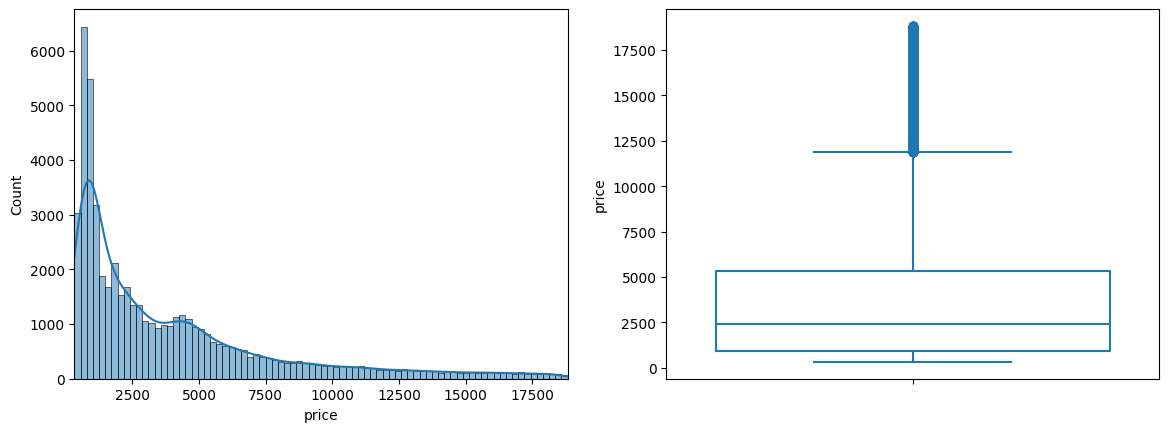

In [ ]:
# price
print(df["price"].describe())

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.histplot(data=df, x="price", kde=True, ax=ax[0])
ax[0].set_xlim(df["price"].min(), df["price"].max())
#ax[0].set_yscale("log")

sns.boxplot(data=df, y="price", ax=ax[1], fill=False)

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64


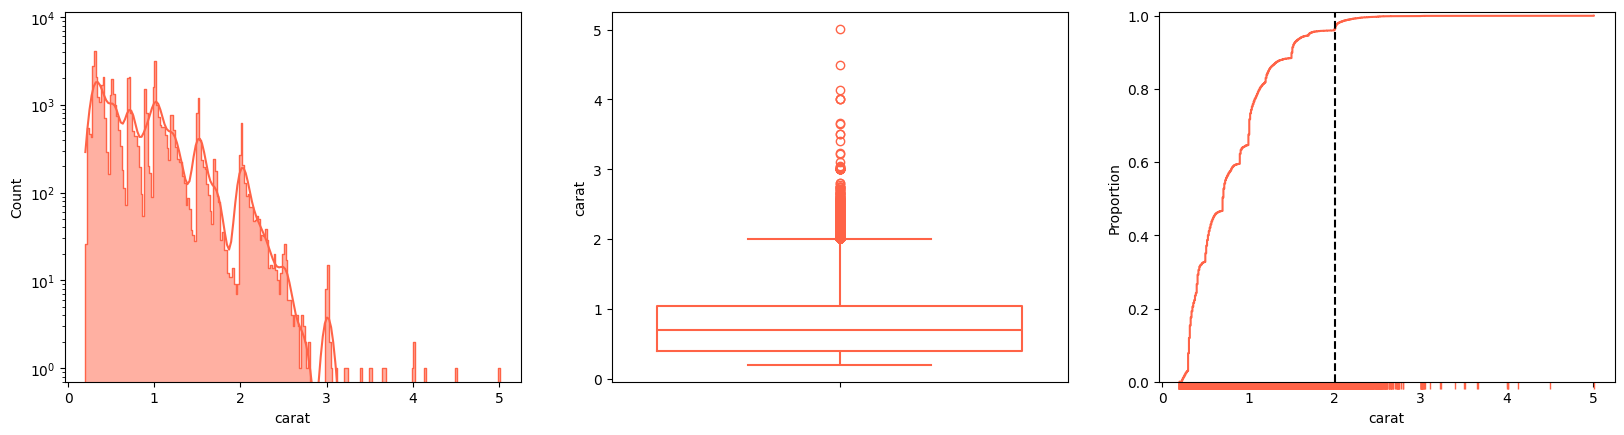

In [ ]:
# carat
print(df["carat"].describe())

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.histplot(data=df, x="carat", element="step", stat="count", kde=True, color="tomato", ax=ax[0], binwidth=0.02)
ax[0].set_yscale("log")
ax[0].set_ylim(0.7)

sns.boxplot(data=df, y="carat", fill=False, ax=ax[1], color="tomato")

sns.ecdfplot(data=df, x="carat", color="tomato")
ax[2].set_ylim(0, 1.01)
sns.rugplot(data=df, x="carat", ax=ax[2], clip_on=False, height=-.02, color="tomato")
ax[2].axvline(x=2, ymin=0, ymax=1, linestyle = "dashed", color="black")

<Axes: xlabel='cut', ylabel='count'>

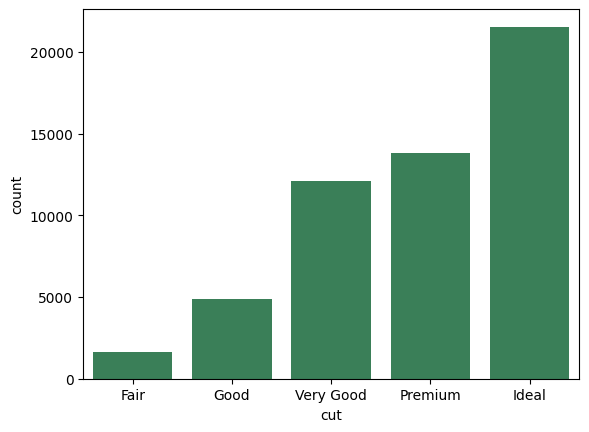

In [ ]:
# cut
sns.countplot(data=df, x="cut", order=cut_order, color="seagreen")

<Axes: xlabel='color', ylabel='count'>

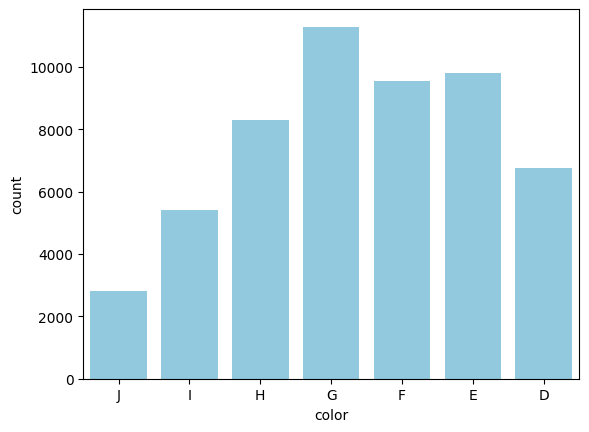

In [ ]:
# color
sns.countplot(data=df, x="color", order=color_order, color="skyblue")

<Axes: xlabel='clarity', ylabel='count'>

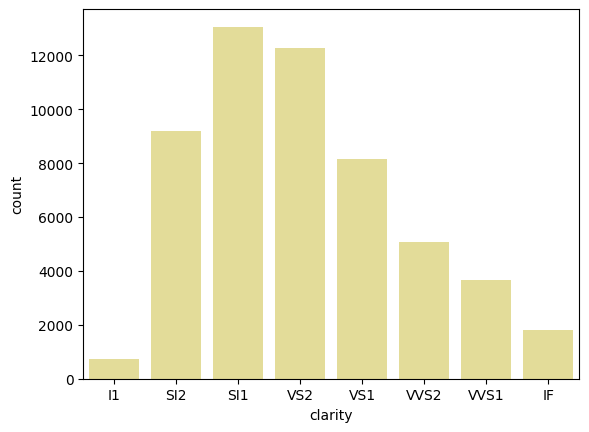

In [ ]:
# clarity
sns.countplot(data=df, x="clarity", order=clarity_order, color="khaki")

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64


<Axes: ylabel='depth'>

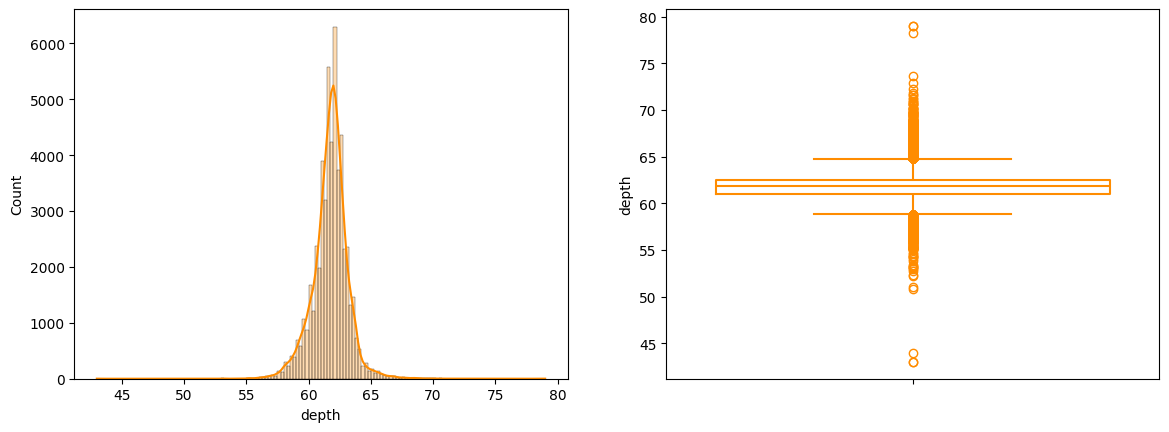

In [ ]:
# depth
print(df["depth"].describe())

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.histplot(data=df, x="depth", kde=True, color="darkorange", alpha=.3, ax=ax[0], stat="count", binwidth=0.25)

sns.boxplot(data=df, y="depth", fill=False, ax=ax[1], color="darkorange")

In [ ]:
stats.normaltest(df["depth"])

NormaltestResult(statistic=6613.701779944535, pvalue=0.0)

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


<Axes: ylabel='table'>

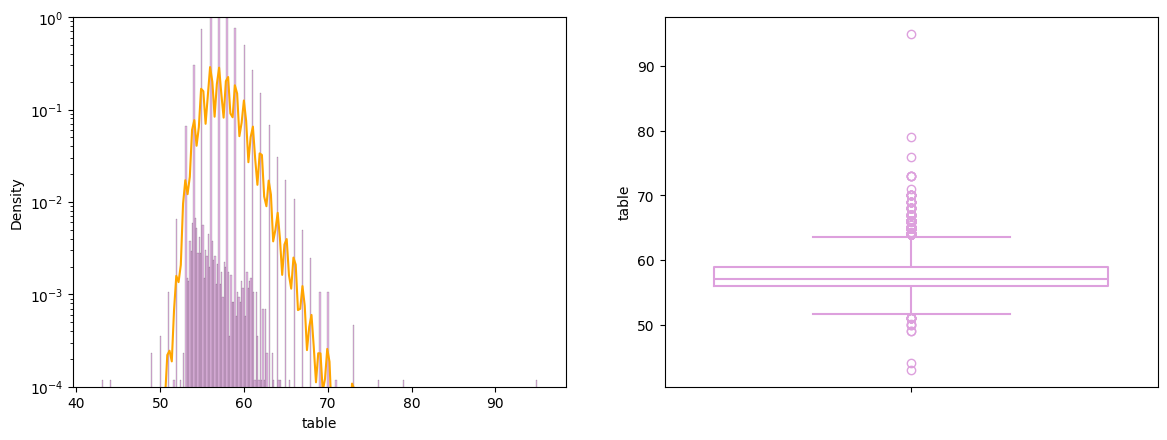

In [ ]:
# table
print(df["table"].describe())

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.histplot(data=df, x="table", ax=ax[0], stat="density", color="plum")
ax[0].set_yscale("log")
sns.kdeplot(data=df, x="table", ax=ax[0], color="orange")
ax[0].set_ylim(0.0001, 1)

sns.boxplot(data=df, y="table", fill=False, ax=ax[1], color="plum")

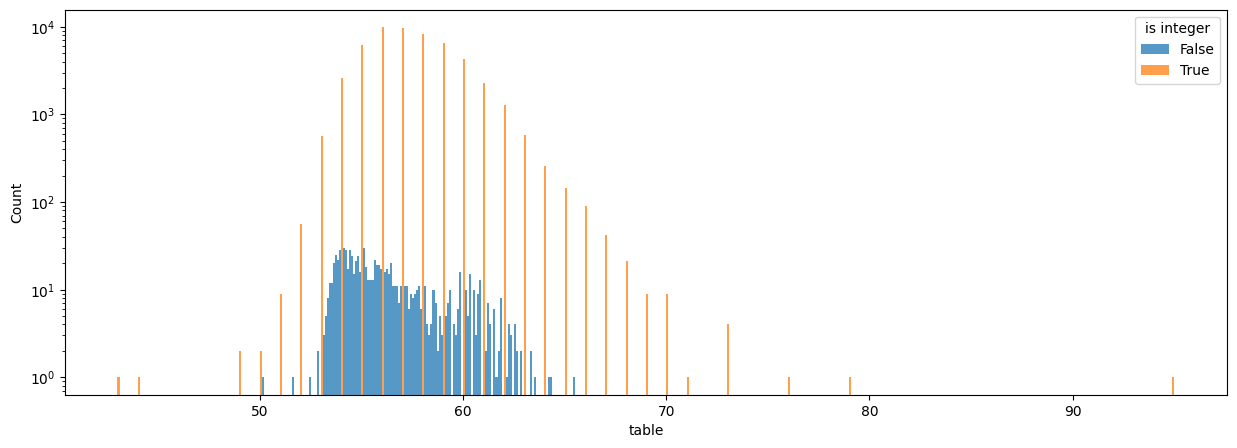

In [ ]:
df_slice = df[["table"]].copy()
df_slice["is integer"] = df_slice["table"].apply(float.is_integer)

plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_slice, x="table", hue="is integer", multiple="stack", binwidth=0.1, linewidth=0)
ax.set_yscale("log")

count    53932.000000
mean         5.732007
std          1.119670
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


<Axes: ylabel='x'>

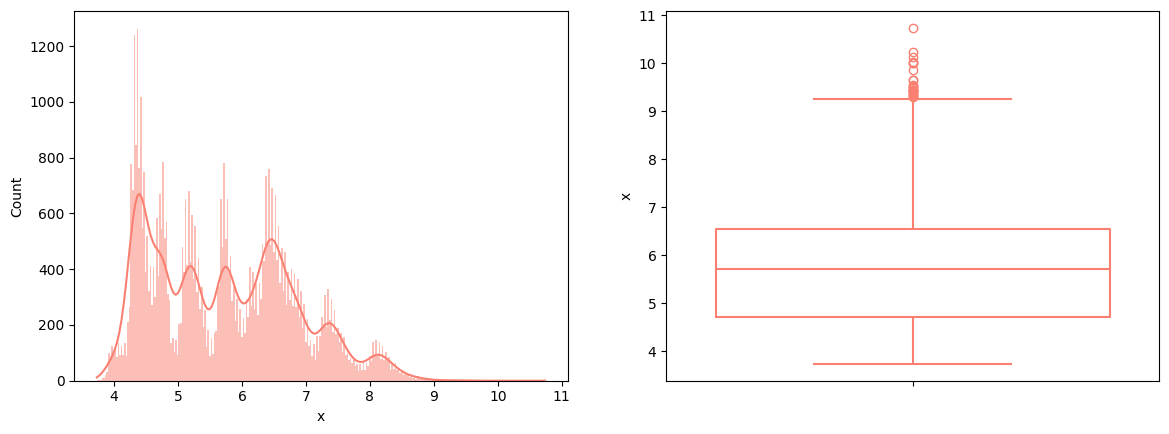

In [ ]:
# x
df_slice_x = df[df["x"] != 0]
print(df_slice_x["x"].describe())

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.histplot(data=df_slice_x, x="x", kde=True, color="salmon", binwidth=0.025, linewidth=0, ax=ax[0])

sns.boxplot(data=df_slice_x, y="x", color="salmon", ax=ax[1], fill=False)


In [ ]:
# y
# исправление слишком больших значений
df.loc[[24067, 49189], "y"] = df["y"] / 10

count    53933.000000
mean         5.733757
std          1.111524
min          3.180000
25%          4.720000
50%          5.710000
75%          6.540000
max         10.540000
Name: y, dtype: float64


<Axes: ylabel='y'>

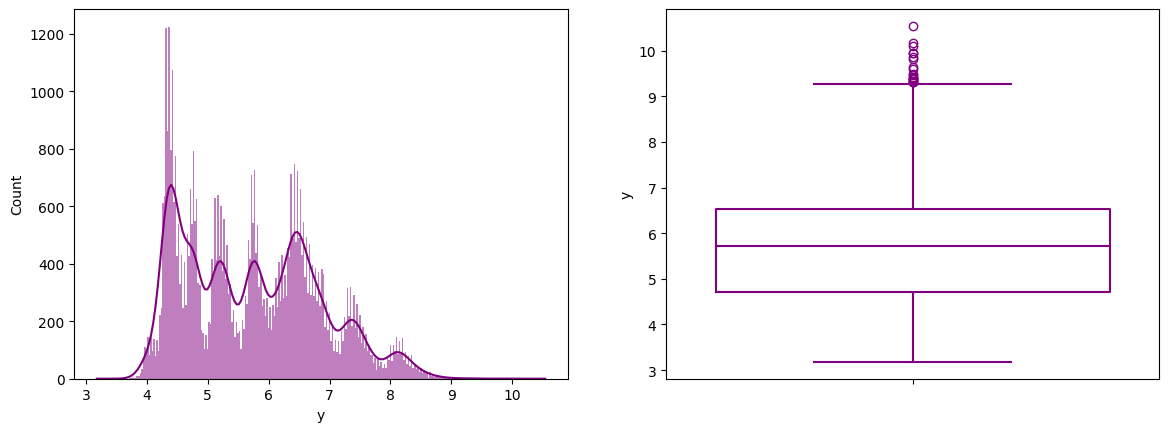

In [ ]:
df_slice_y = df[(df["y"] != 0)]
print(df_slice_y["y"].describe())

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.histplot(data=df_slice_y, x="y", kde=True, color="purple", binwidth=0.025, linewidth=0, ax=ax[0])

sns.boxplot(data=df_slice_y, y="y", color="purple", ax=ax[1], fill=False)

In [ ]:
# z
# исправление слишком больших значений
df.loc[[48410], "z"] = df["z"] / 10

count    53920.000000
mean         3.539516
std          0.691910
min          1.070000
25%          2.910000
50%          3.530000
75%          4.040000
max          8.060000
Name: z, dtype: float64


<Axes: ylabel='z'>

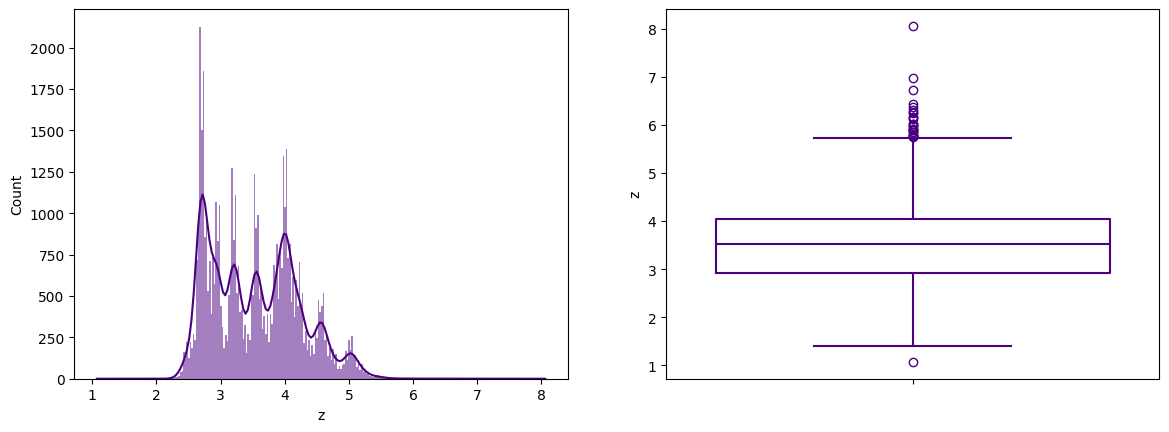

In [ ]:
df_slice_z = df[(df["z"] != 0)]
print(df_slice_z["z"].describe())

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.histplot(data=df_slice_z, x="z", kde=True, color="indigo", binwidth=0.025, linewidth=0, ax=ax[0])

sns.boxplot(data=df_slice_z, y="z", color="indigo", ax=ax[1], fill=False)

(0.1, 11.277000000000001)

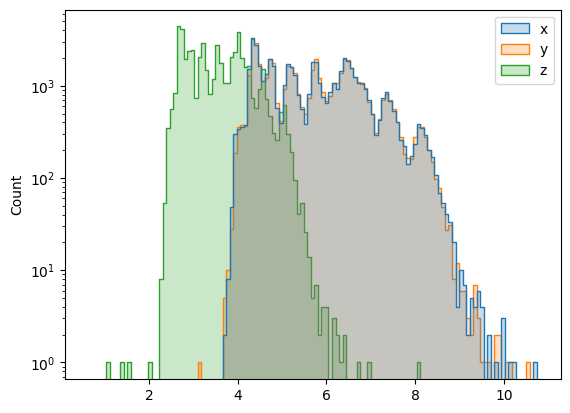

In [ ]:
ax = sns.histplot(data=df[["x", "y", "z"]], element="step")
ax.set_yscale("log")
ax.set_xlim(0.1)

## Наблюдения

**price**: наблюдается довольно плавная обратная нелинайная зависимость цены и количества наблюдений.

**carat**: 96.5% наблюдений имеет значение <=2. Вероятно, помимо веса при формировании датасета учитывался ценовой диапозон, который обычно включает бриллианты небольшого веса. При общей убывающей количественной тенденции число камней для некоторых значений веса резко отличается от соседних. Это может быть случайностью, что в датасет попало много бриллиантов с одинаковым весом, но возможно, есть причина, по которой мастера огранки стремятся имеено к этим значениям.

**cut**: чем выше качество огранки, тем больше наблюдений для него представлено в датасете.

**depth**: теоретически эта величина определяет пропорциональность формы бриллианта и влияет на его качество. Значения расположены в узком интервале и стремятся к среднему. Распределение этого признака напоминает нормальное, однако критерий согласия Пирсона не подтверждает это предположение.

**table**: значения расположены довольно компакно, выбросов мало. Примечательно, что гистограмма выглядит так, будто два разных графика наложили друг на друга, причем один из них дискретный. По какой-то причине целочисленные значения для данного признака встречаются намного чаще, чем дробные.

**x**: Значения стремятся к некоторым определенным значениям, формируя группы. Вероятно, это распределение повторяет рисунок распределения признака carat, при условии, что они тесно связаны.

**y**: Значения похожим образом группируются около некоторых значений ширины. Кроме того, эти значения для x и y совпадают. Можно предположить, что эти величины приблизительно равны.

**z**: Значения так же формируют группы, но уже относительно других значений.

## Гипотезы:

*   существует причина, по которой бриллиантов определенного веса больше, чем остальных.



# Двумерный анализ

In [ ]:
# создание числовых столбцов для ранговых столбцов
df["cut_rank"] = df["cut"].apply(lambda v: cut_order.index(v) + 1)
df["color_rank"] = df["color"].apply(lambda v: color_order.index(v) + 1)
df["clarity_rank"] = df["clarity"].apply(lambda v: clarity_order.index(v) + 1)

<Axes: >

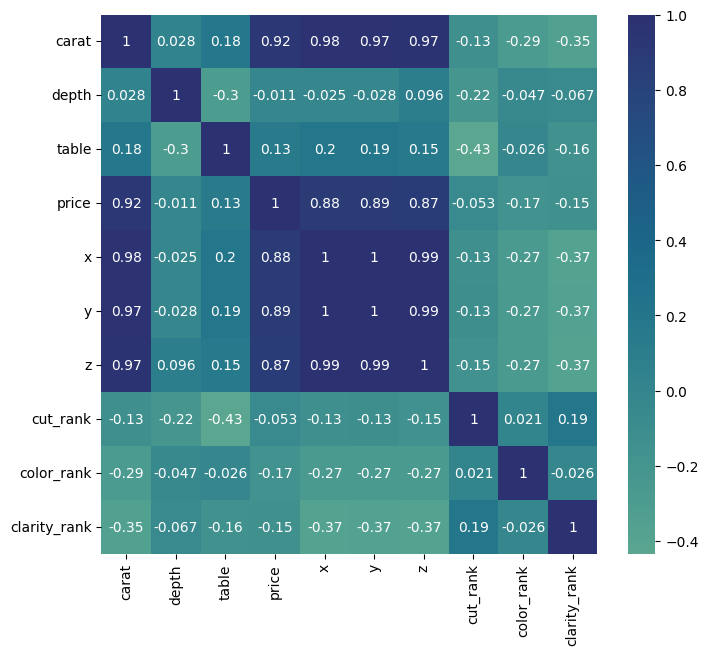

In [ ]:
df_corr = df.drop(columns=["cut", "color", "clarity"], axis=1).corr()

plt.figure(figsize=(8, 7))
sns.heatmap(data=df_corr, annot=True, center=0, cmap="crest")

In [ ]:
# отфильтрованный датасет, в котором нет значений 0 для столбцов x, y, z
df_no_zero_xyz = df[(df["x"] != 0) & (df["y"] != 0) & (df["z"] != 0)]

## carat

<Axes: xlabel='carat', ylabel='z'>

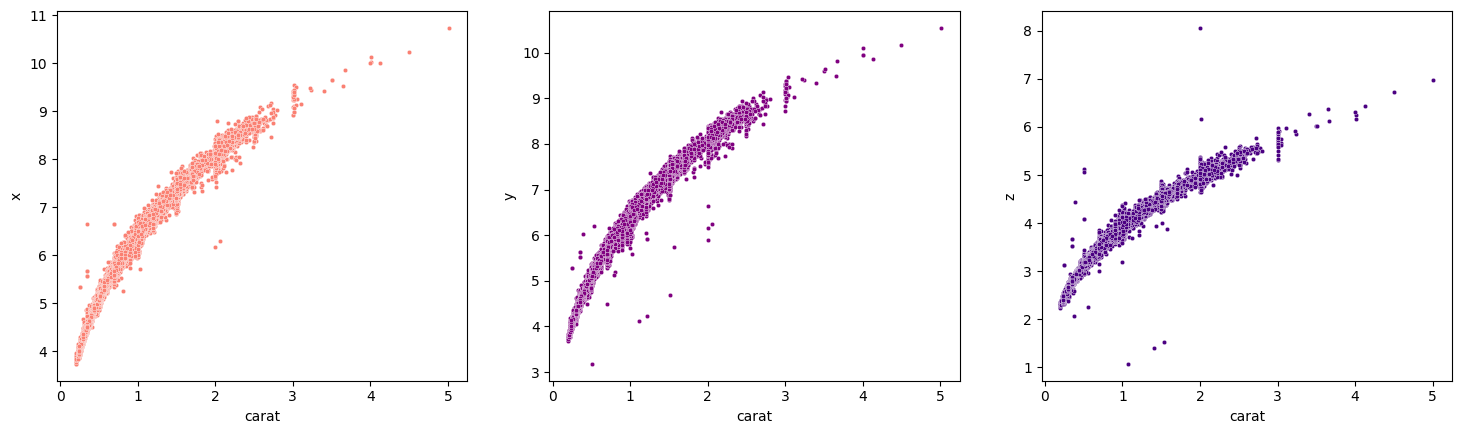

In [ ]:
# зависимость carat и x, y, z
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(18)
sns.scatterplot(data=df_no_zero_xyz, x="carat", y="x", ax=ax[0], color="salmon", s=10)
sns.scatterplot(data=df_no_zero_xyz, x="carat", y="y", ax=ax[1], color="purple", s=10)
sns.scatterplot(data=df_no_zero_xyz, x="carat", y="z", ax=ax[2], color="indigo", s=10)

<Axes: xlabel='carat', ylabel='price'>

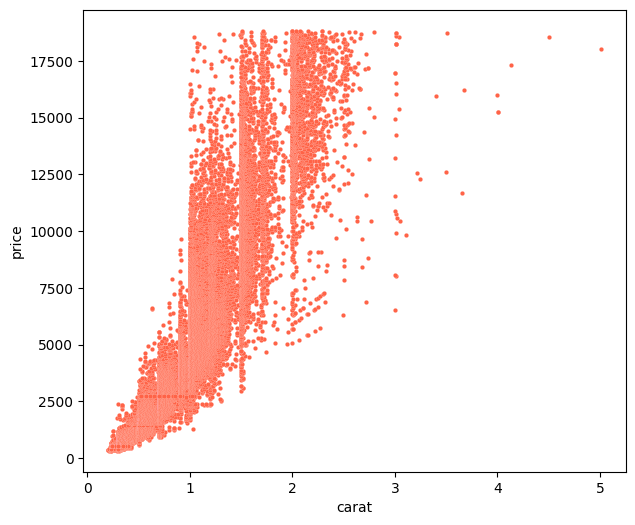

In [ ]:
# зависимость carat и price
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="carat", y="price", s=10, linewidth=0.1, color="tomato")

<Axes: xlabel='carat', ylabel='price'>

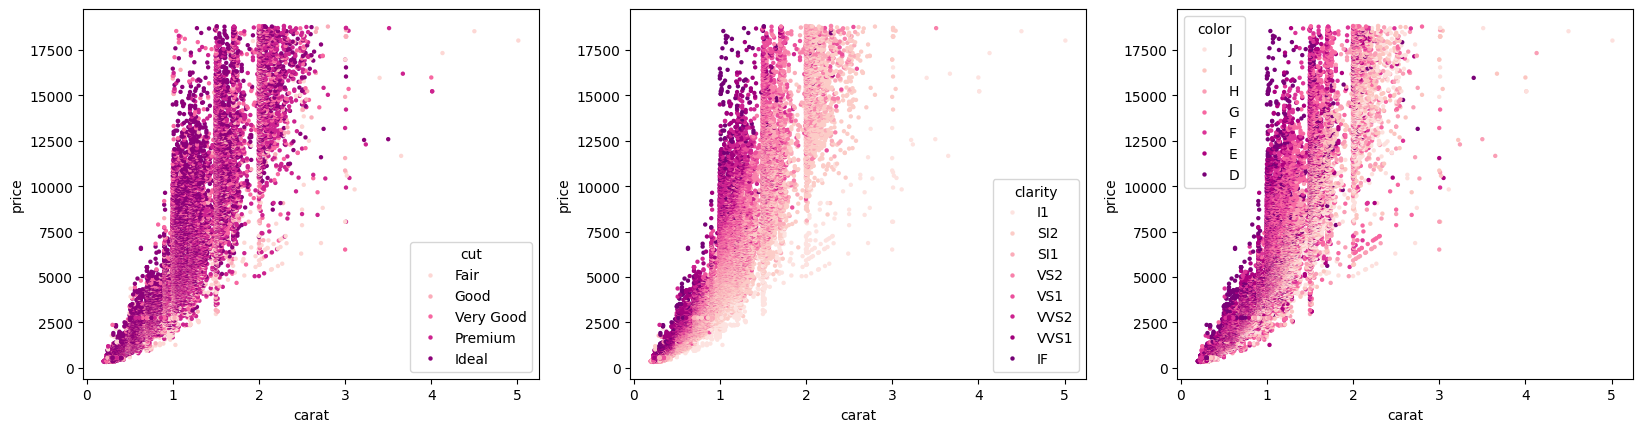

In [ ]:
# зависимость carat и price с учетом категориальных признаков
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.scatterplot(data=df, x="carat", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, ax=ax[0], palette="RdPu")
sns.scatterplot(data=df, x="carat", y="price", s=10, linewidth=0, hue="clarity", hue_order=clarity_order, ax=ax[1], palette="RdPu")
sns.scatterplot(data=df, x="carat", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, ax=ax[2], palette="RdPu")

Text(0.5, 1.0, 'clarity = IF')

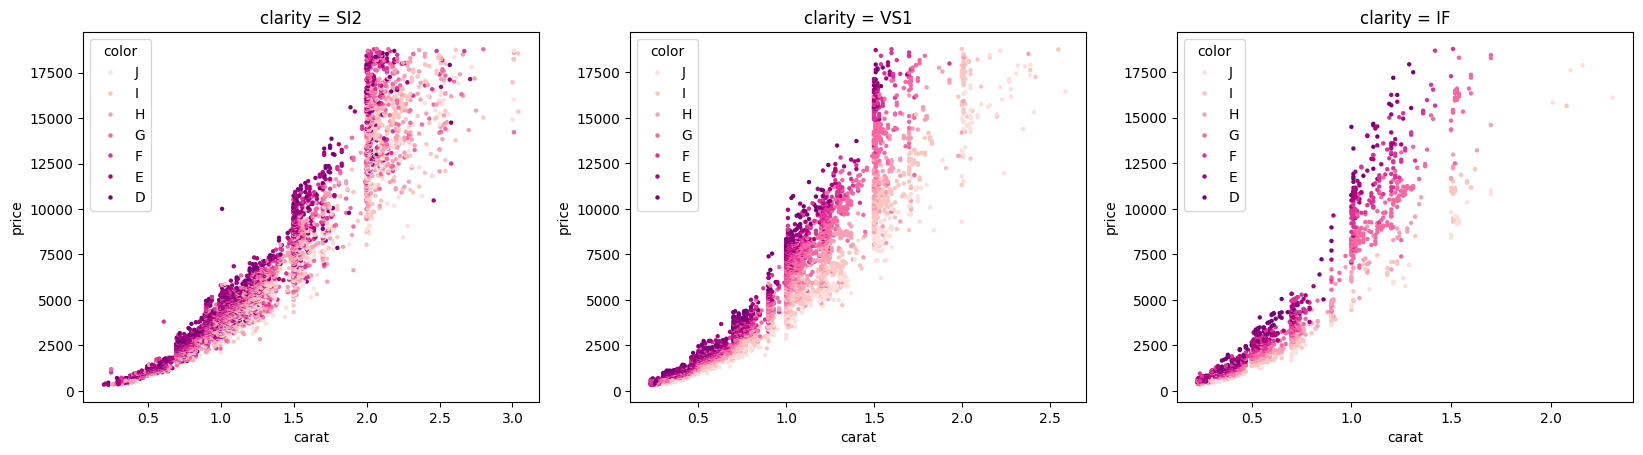

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.scatterplot(data=df[df["clarity"] == "SI2"], x="carat", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, palette="RdPu", ax=ax[0])
ax[0].set_title("clarity = SI2")
sns.scatterplot(data=df[df["clarity"] == "VS1"], x="carat", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, palette="RdPu", ax=ax[1])
ax[1].set_title("clarity = VS1")
sns.scatterplot(data=df[df["clarity"] == "VVS1"], x="carat", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, palette="RdPu", ax=ax[2])
ax[2].set_title("clarity = IF")

Text(0.5, 1.0, 'clarity = VVS2 and color = E')

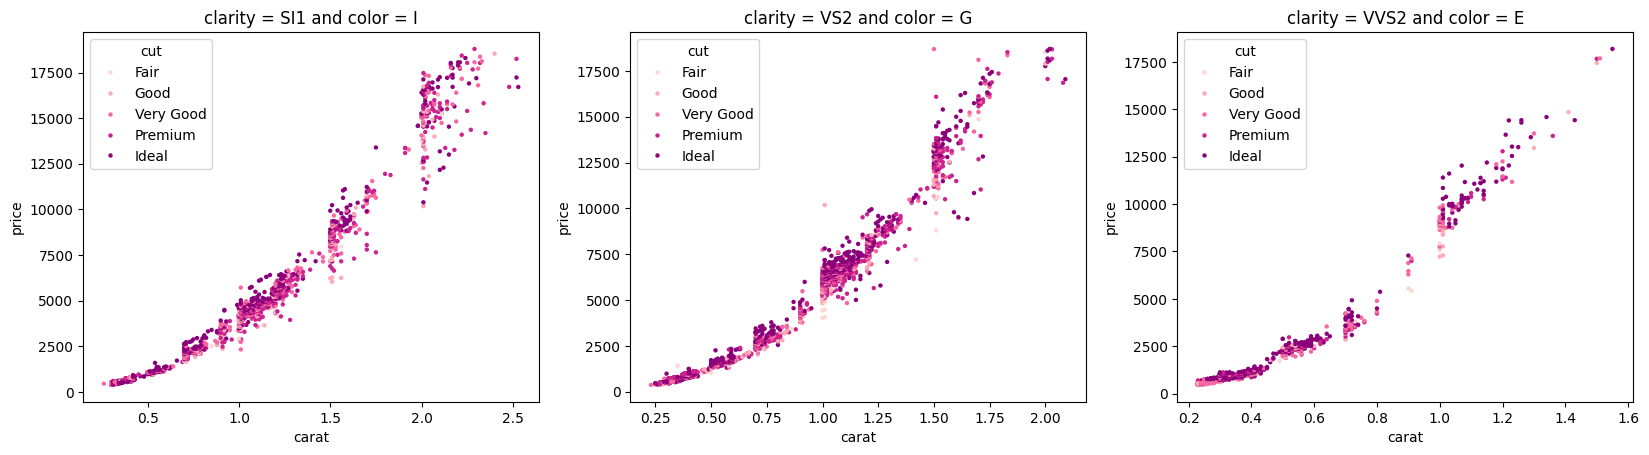

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.scatterplot(data=df[(df["clarity"] == "SI1") & (df["color"] == "I")], x="carat", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[0])
ax[0].set_title("clarity = SI1 and color = I")
sns.scatterplot(data=df[(df["clarity"] == "VS2") & (df["color"] == "G")], x="carat", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[1])
ax[1].set_title("clarity = VS2 and color = G")
sns.scatterplot(data=df[(df["clarity"] == "VVS2") & (df["color"] == "E")], x="carat", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[2])
ax[2].set_title("clarity = VVS2 and color = E")

 Я хочу посмотреть, есть ли очевидная причина, почему бриллианты с определенным весом встречаются в датасете намного чаще. Например, цена камня резко возрастает при достижении определенных значений веса.

 Для этого построю линейные графики средней цены для бриллиантов веса, который представлен в датасете больше всего и меньше всего.

<Axes: xlabel='carat', ylabel='Count'>

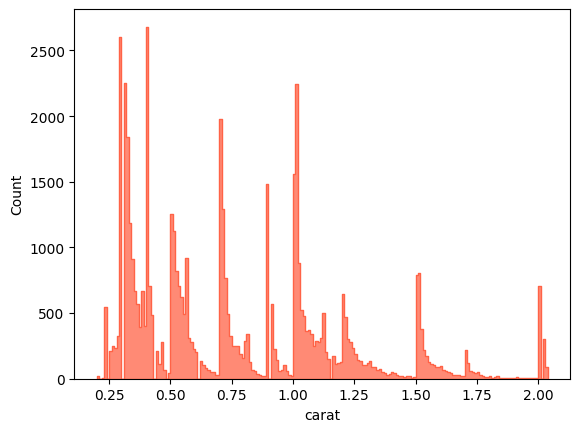

In [ ]:
# распределение столбца carat
sns.histplot(data=df[df["carat"] < 2.05], x="carat", element="step", stat="count", color="tomato", binwidth=0.01)

<Axes: xlabel='carat', ylabel='price'>

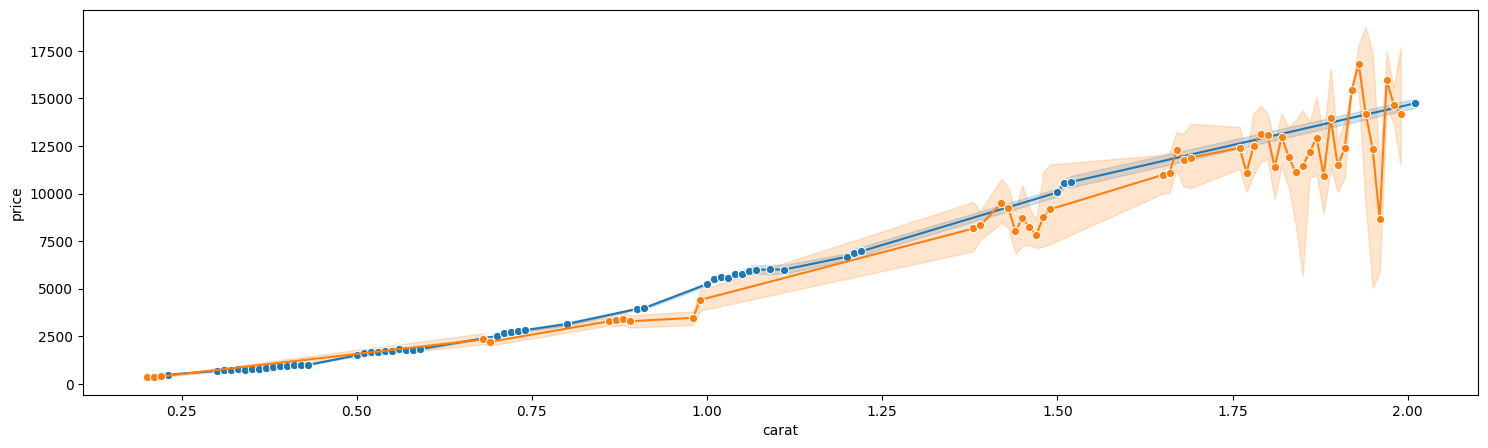

In [ ]:
carat_count = df[df["carat"] < 2.05]["carat"].value_counts()
plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=df[df["carat"].isin(carat_count.head(50).index)], x="carat", y="price", marker="o")
sns.lineplot(data=df[df["carat"].isin(carat_count.tail(50).index)], x="carat", y="price", ax=ax, marker="o")

## depth

<Axes: xlabel='carat', ylabel='depth'>

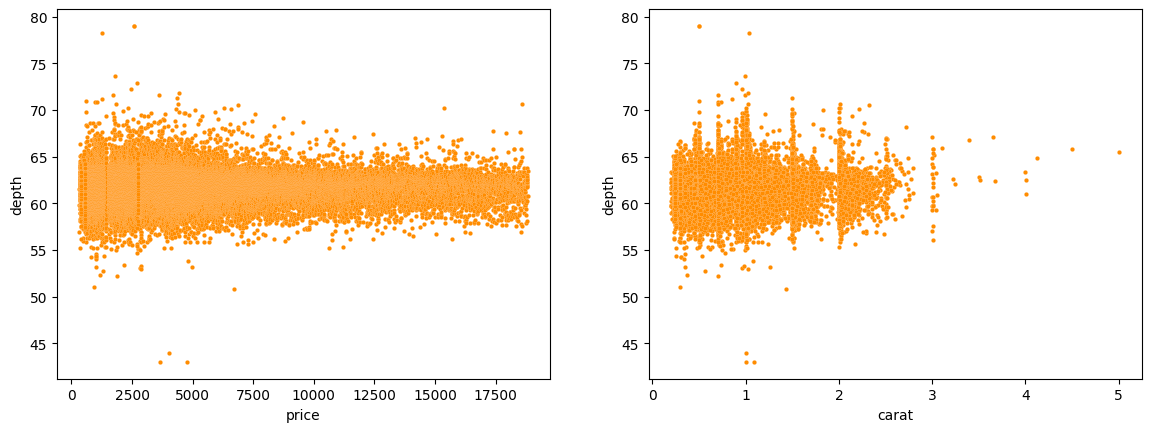

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.scatterplot(data=df, x="price", y="depth", s=10, linewidth=0.1, ax=ax[0], color="darkorange")
sns.scatterplot(data=df, x="carat", y="depth", s=10, linewidth=0.1, ax=ax[1], color="darkorange")

<Axes: xlabel='clarity', ylabel='depth'>

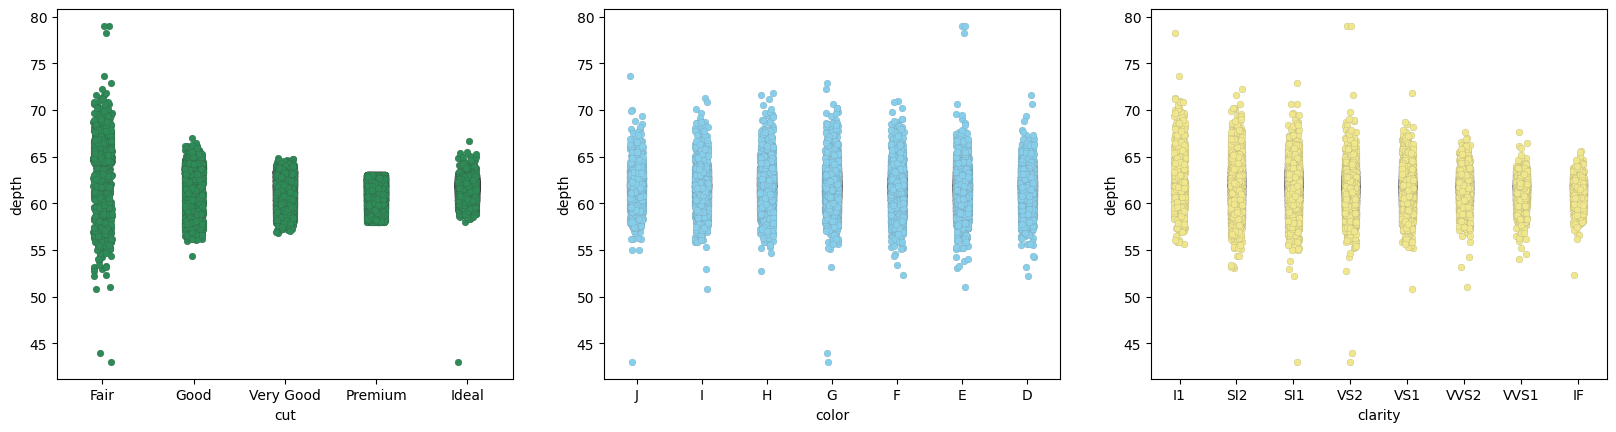

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.stripplot(data=df, x="cut", y="depth", order=cut_order, linewidth=0.1, color="seagreen", ax=ax[0])
sns.stripplot(data=df, x="color", y="depth", order=color_order, linewidth=0.1, color="skyblue", ax=ax[1])
sns.stripplot(data=df, x="clarity", y="depth", order=clarity_order, linewidth=0.1, color="khaki", ax=ax[2])

In [ ]:
# абсолютная величина отклонения значения depth от медианы
df["depth_dev"] = df["depth"].median() - df["depth"]
df["depth_dev"] = df["depth_dev"].apply(abs)

<Axes: xlabel='clarity', ylabel='depth_dev'>

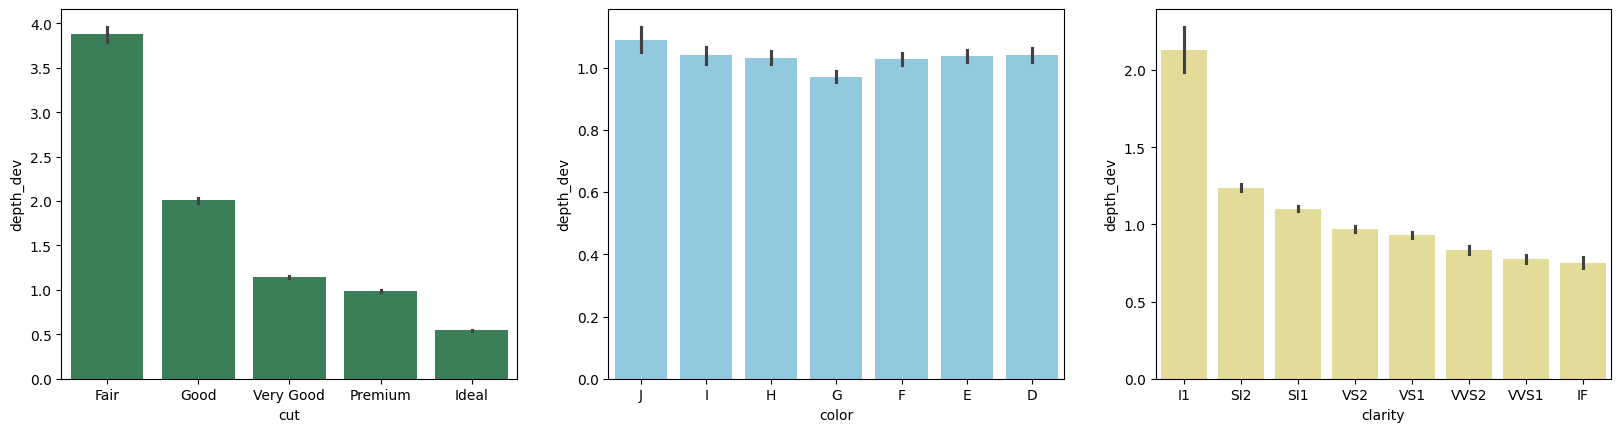

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.barplot(data=df, x="cut", y="depth_dev", order=cut_order, color="seagreen", ax=ax[0])
sns.barplot(data=df, x="color", y="depth_dev", order=color_order, color="skyblue", ax=ax[1])
sns.barplot(data=df, x="clarity", y="depth_dev", order=clarity_order, color="khaki", ax=ax[2])

In [ ]:
df["cut_rank"].corr(other=df['depth_dev'])

-0.5838032603631158

In [ ]:
df["clarity_rank"].corr(other=df['depth_dev'])

-0.16572454891610316

## table

<Axes: xlabel='carat', ylabel='table'>

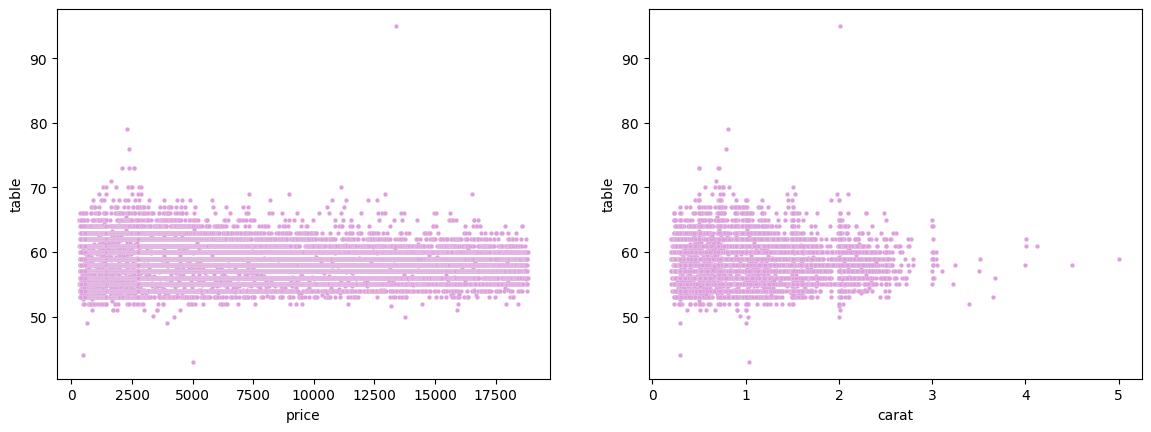

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.scatterplot(data=df, x="price", y="table", s=10, linewidth=0.1, ax=ax[0], color="plum")
sns.scatterplot(data=df, x="carat", y="table", s=10, linewidth=0.1, ax=ax[1], color="plum")

<Axes: xlabel='clarity', ylabel='table'>

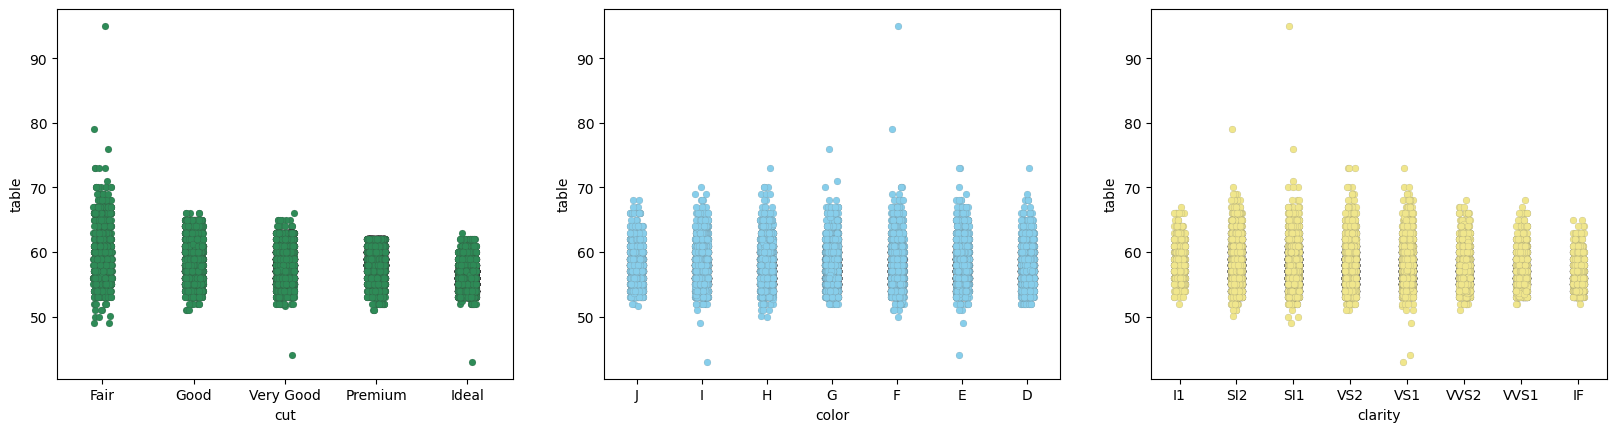

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.stripplot(data=df, x="cut", y="table", order=cut_order, color="seagreen", linewidth=0.1, ax=ax[0])
sns.stripplot(data=df, x="color", y="table", order=color_order, color="skyblue", linewidth=0.1, ax=ax[1])
sns.stripplot(data=df, x="clarity", y="table", order=clarity_order, color="khaki", linewidth=0.1, ax=ax[2])

In [ ]:
# абсолютное отклонение величины table от медианы
df["table_dev"] = df["table"].median() - df["table"]
df["table_dev"] = df["table_dev"].apply(abs)

<Axes: xlabel='clarity', ylabel='table_dev'>

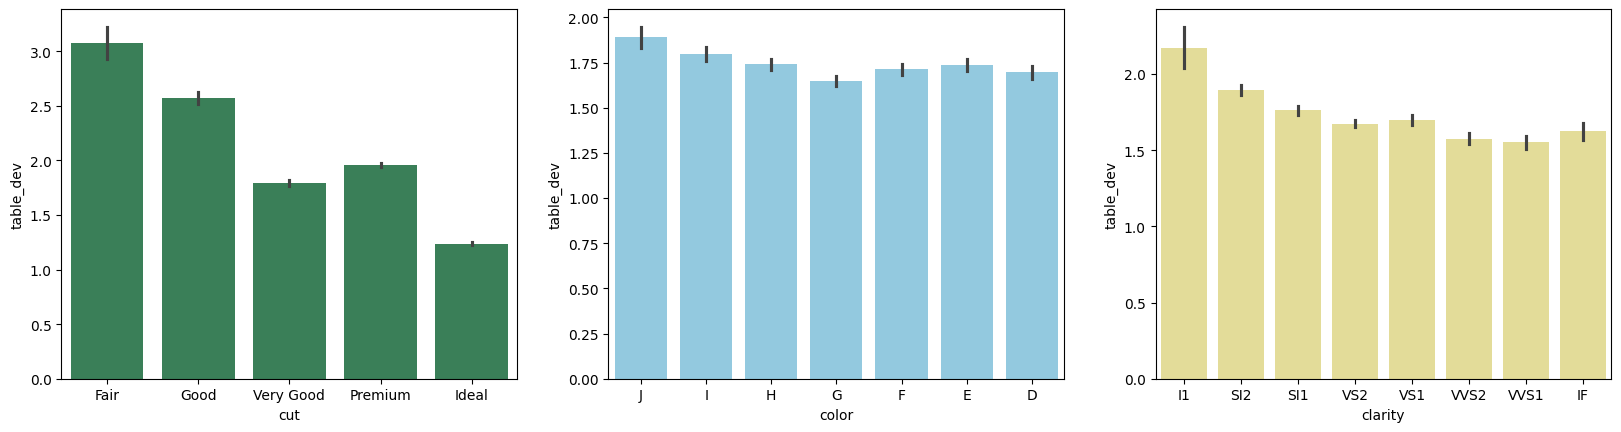

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.barplot(data=df, x="cut", y="table_dev", order=cut_order, color="seagreen", ax=ax[0])
sns.barplot(data=df, x="color", y="table_dev", order=color_order, color="skyblue", ax=ax[1])
sns.barplot(data=df, x="clarity", y="table_dev", order=clarity_order, color="khaki", ax=ax[2])

In [ ]:
df["table_dev"].corr(other=df["cut_rank"])

-0.29113226247964724

<Axes: xlabel='table', ylabel='depth'>

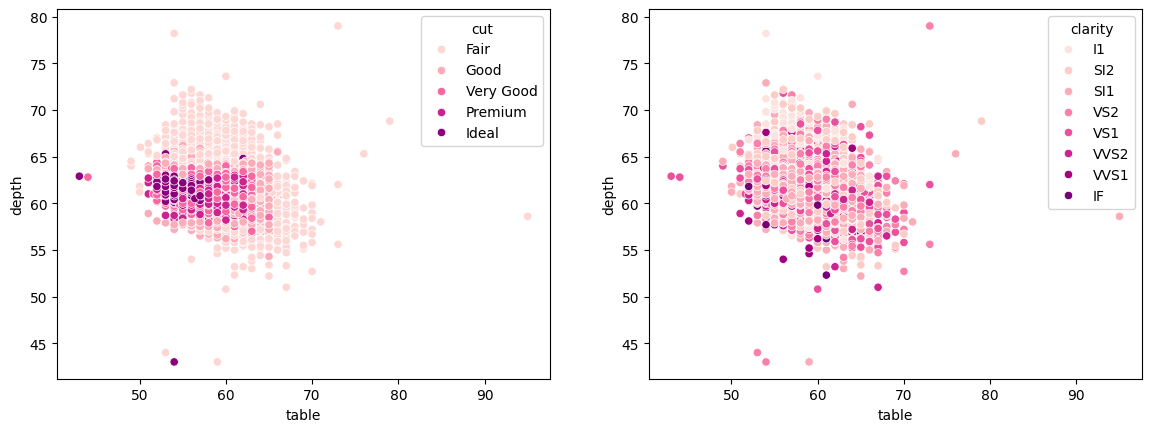

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.scatterplot(data=df, x="table", y="depth", hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[0])
sns.scatterplot(data=df, x="table", y="depth", hue="clarity", hue_order=clarity_order, palette="RdPu", ax=ax[1])

## x, y, z

<Axes: xlabel='z', ylabel='price'>

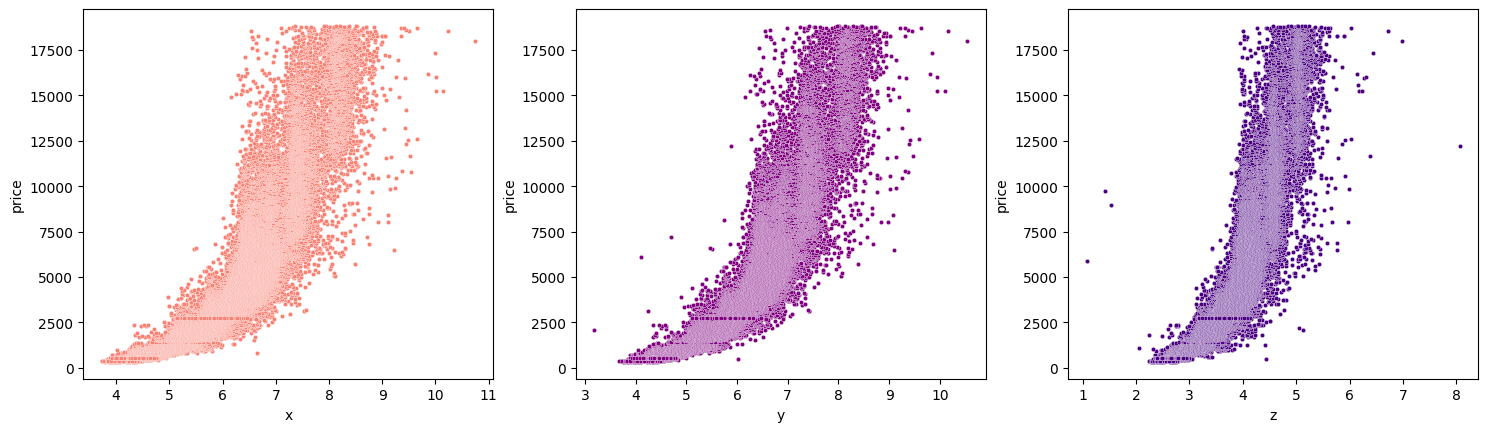

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(18)
sns.scatterplot(data=df_no_zero_xyz, x="x", y="price", ax=ax[0], color="salmon", s=10)
sns.scatterplot(data=df_no_zero_xyz, x="y", y="price", ax=ax[1], color="purple", s=10)
sns.scatterplot(data=df_no_zero_xyz, x="z", y="price", ax=ax[2], color="indigo", s=10)

<Axes: xlabel='z', ylabel='price'>

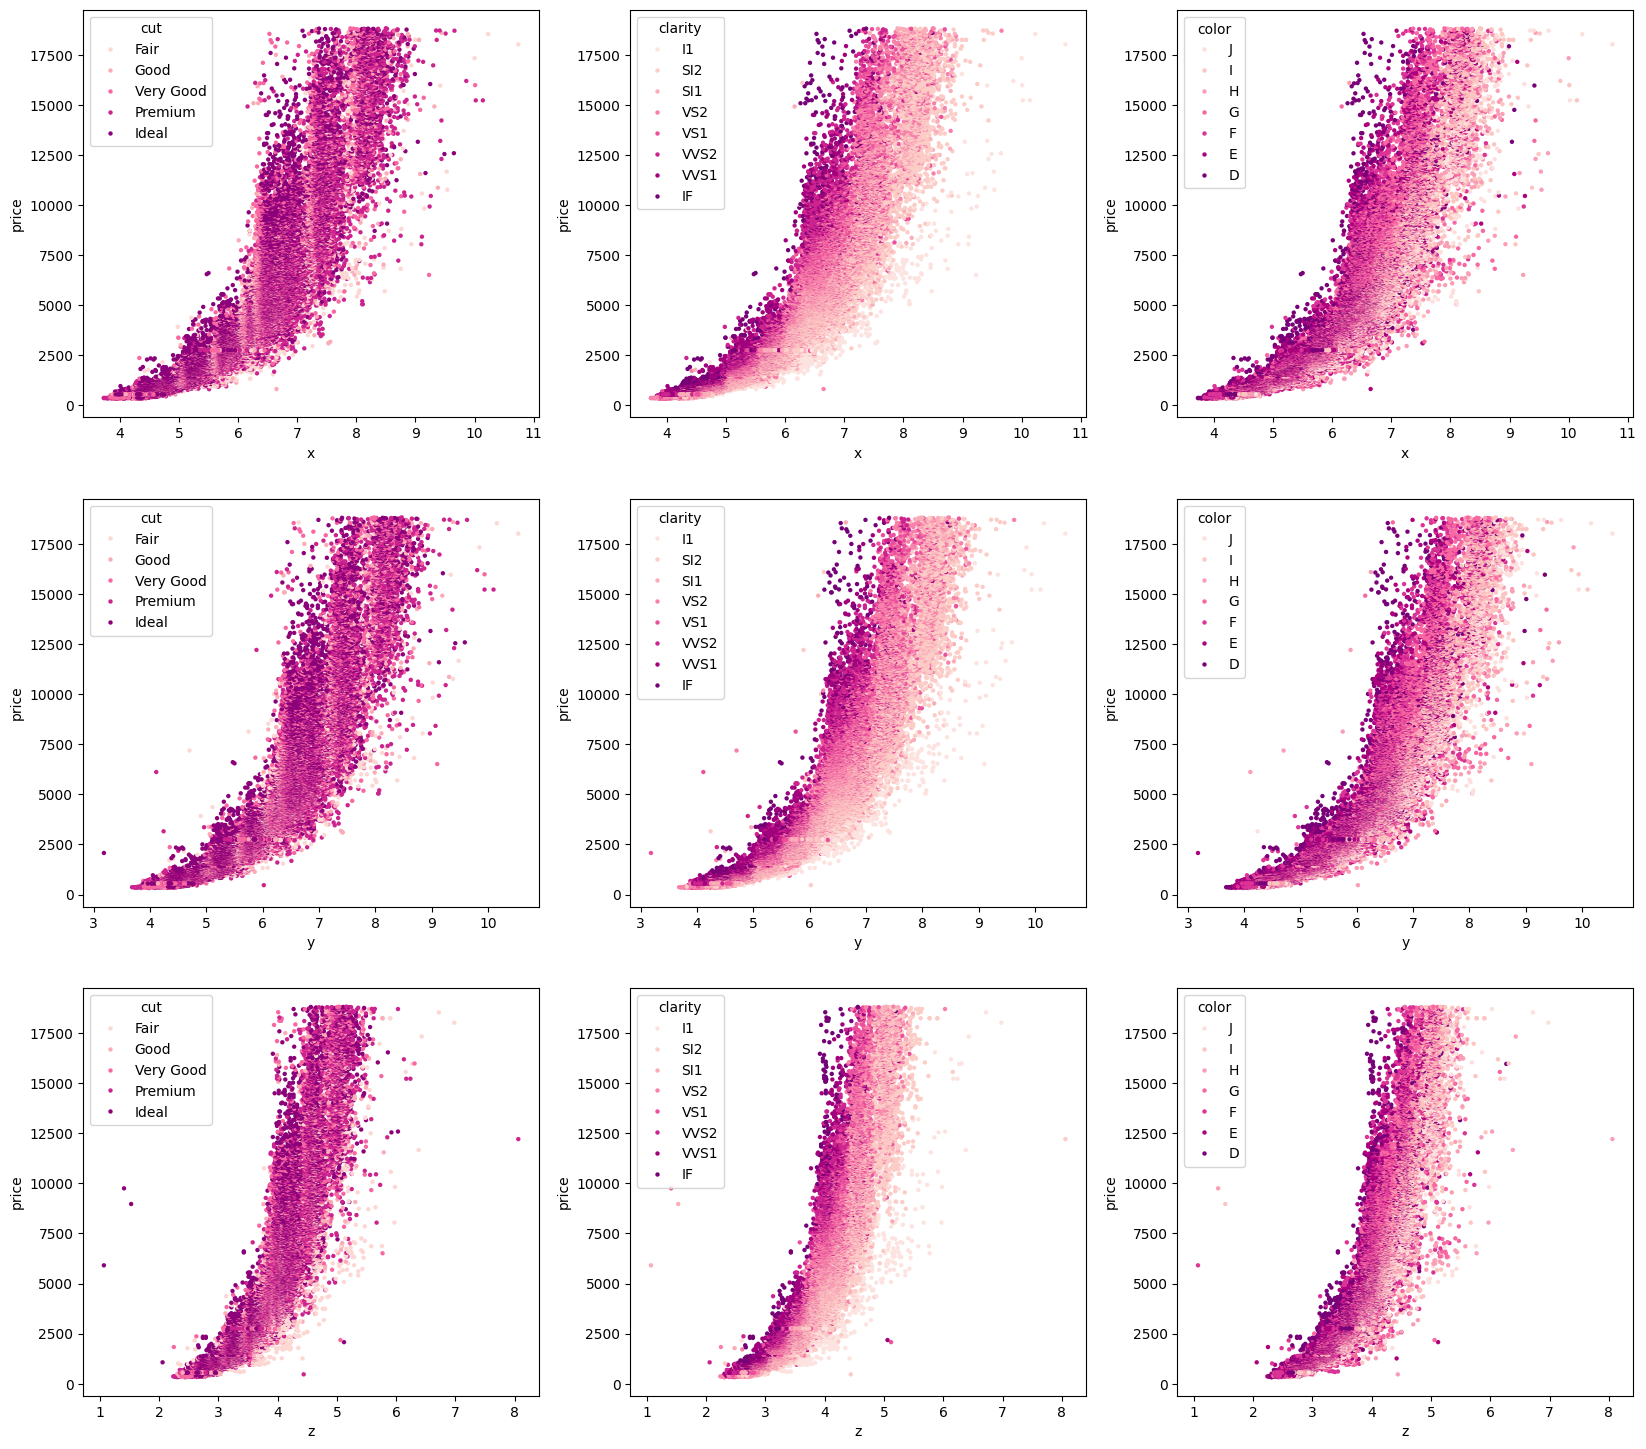

In [ ]:
# зависимость x, y, z и price с учетом категориальных признаков
fig, ax = plt.subplots(3, 3)
fig.set_figheight(18)
fig.set_figwidth(20)
sns.scatterplot(data=df_no_zero_xyz, x="x", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, ax=ax[0][0], palette="RdPu")
sns.scatterplot(data=df_no_zero_xyz, x="x", y="price", s=10, linewidth=0, hue="clarity", hue_order=clarity_order, ax=ax[0][1], palette="RdPu")
sns.scatterplot(data=df_no_zero_xyz, x="x", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, ax=ax[0][2], palette="RdPu")

sns.scatterplot(data=df_no_zero_xyz, x="y", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, ax=ax[1][0], palette="RdPu")
sns.scatterplot(data=df_no_zero_xyz, x="y", y="price", s=10, linewidth=0, hue="clarity", hue_order=clarity_order, ax=ax[1][1], palette="RdPu")
sns.scatterplot(data=df_no_zero_xyz, x="y", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, ax=ax[1][2], palette="RdPu")

sns.scatterplot(data=df_no_zero_xyz, x="z", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, ax=ax[2][0], palette="RdPu")
sns.scatterplot(data=df_no_zero_xyz, x="z", y="price", s=10, linewidth=0, hue="clarity", hue_order=clarity_order, ax=ax[2][1], palette="RdPu")
sns.scatterplot(data=df_no_zero_xyz, x="z", y="price", s=10, linewidth=0, hue="color", hue_order=color_order, ax=ax[2][2], palette="RdPu")

Text(0.5, 1.0, 'clarity = VVS2 and color = E')

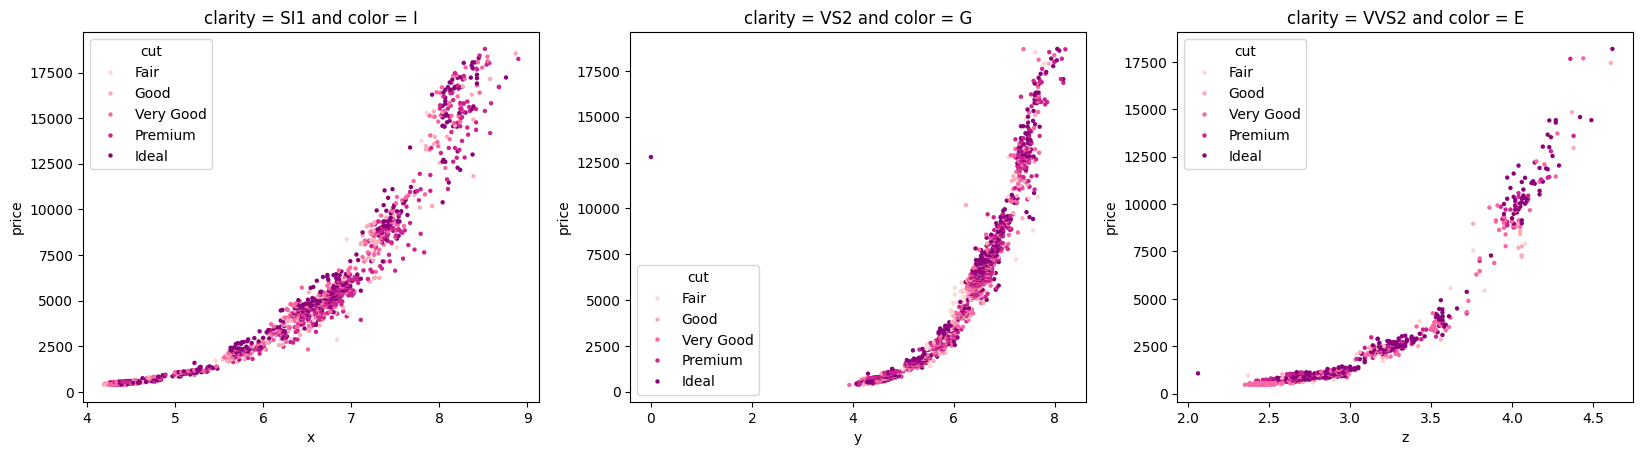

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.scatterplot(data=df[(df["clarity"] == "SI1") & (df["color"] == "I")], x="x", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[0])
ax[0].set_title("clarity = SI1 and color = I")
sns.scatterplot(data=df[(df["clarity"] == "VS2") & (df["color"] == "G")], x="y", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[1])
ax[1].set_title("clarity = VS2 and color = G")
sns.scatterplot(data=df[(df["clarity"] == "VVS2") & (df["color"] == "E")], x="z", y="price", s=10, linewidth=0, hue="cut", hue_order=cut_order, palette="RdPu", ax=ax[2])
ax[2].set_title("clarity = VVS2 and color = E")

## Категориальные признаки

<Axes: xlabel='cut', ylabel='price'>

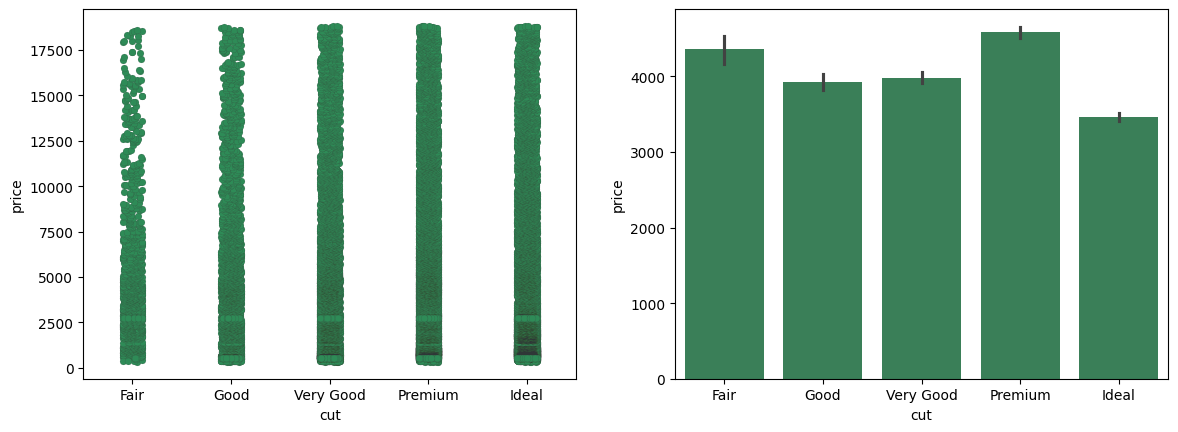

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
sns.stripplot(data=df, x="cut", y="price", order=cut_order, color="seagreen", linewidth=0.1, ax=ax[0])
sns.barplot(data=df, x="cut", y="price", order=cut_order, color="seagreen", ax=ax[1])

<Axes: xlabel='color', ylabel='carat'>

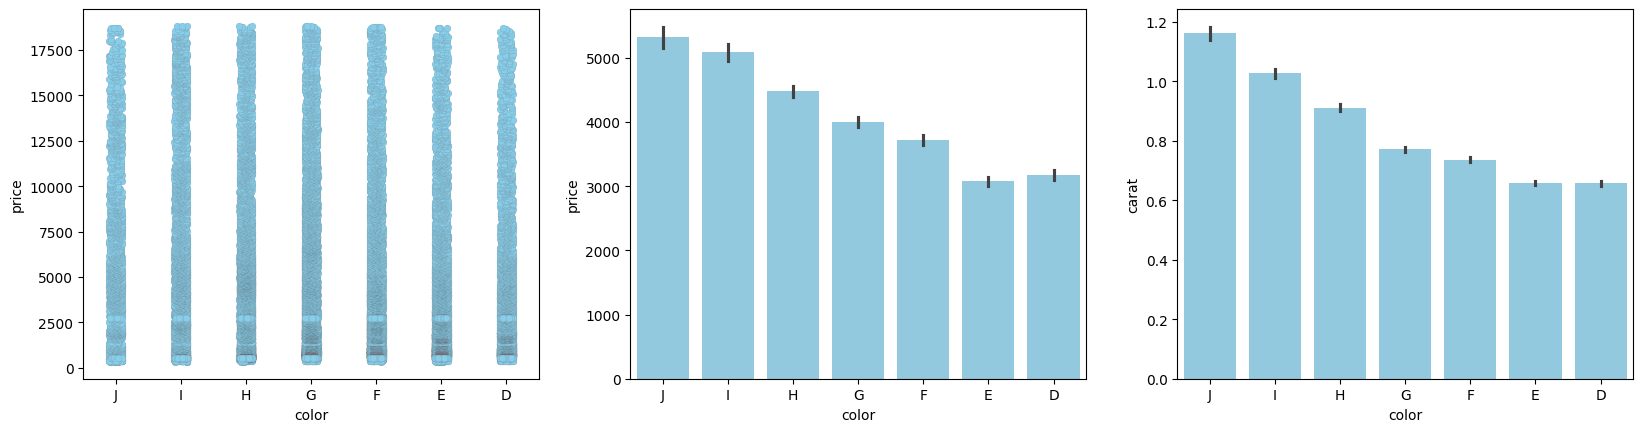

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.stripplot(data=df, x="color", y="price", order=color_order, color="skyblue", linewidth=0.1, ax=ax[0])
sns.barplot(data=df, x="color", y="price", order=color_order, color="skyblue", ax=ax[1])
sns.barplot(data=df, x="color", y="carat", order=color_order, color="skyblue", ax=ax[2])

<Axes: xlabel='clarity', ylabel='carat'>

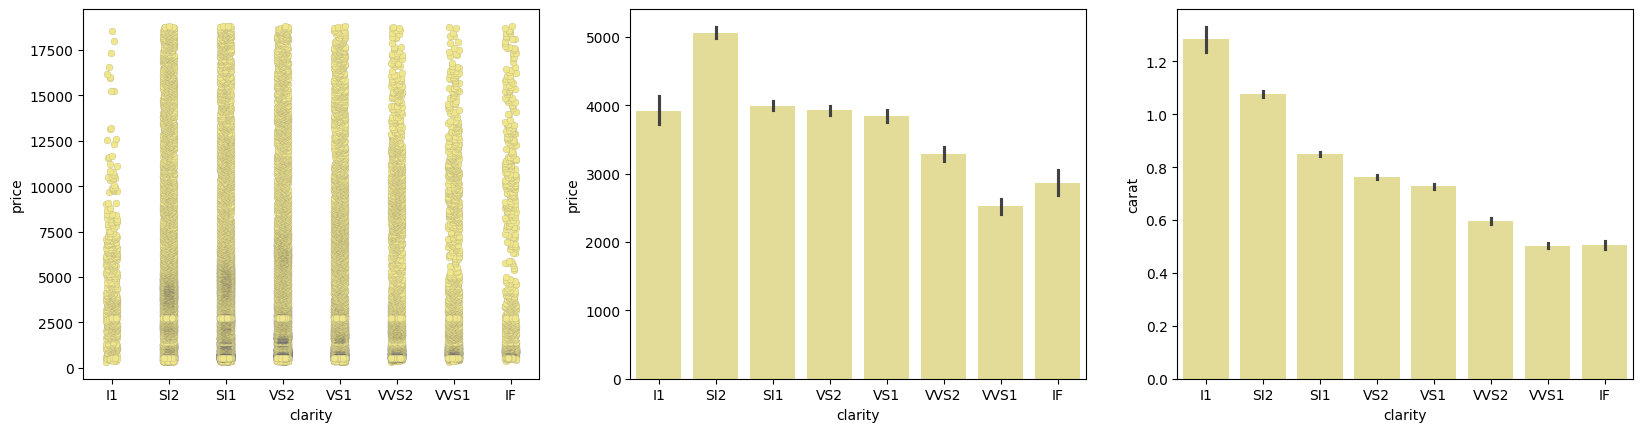

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(20)
sns.stripplot(data=df, x="clarity", y="price", order=clarity_order, color="khaki", linewidth=0.1, ax=ax[0])
sns.barplot(data=df, x="clarity", y="price", order=clarity_order, color="khaki", ax=ax[1])
sns.barplot(data=df, x="clarity", y="carat", order=clarity_order, color="khaki", ax=ax[2])

#  Выводы

**carat**:
*   Наличие пиков в распределении признака считаем случайным. Возможно, выборка не является репрезентативной с точки зрения распределения признака carat.
*   корреляция со значениями x, y, z визуально квадратичная, почти все наблюдения выстраиваются вдоль линии графика некоторой квадратичной функции, однако имеются единичные значительные отклонения, которые интересно бы было исследовать.
*   Наблюдается явная положительная зависимость цены от веса бриллианта. Интересно, что с ростов веса растет размах цены. Значит, есть дополнительные признаки, значительно влияющие на цену. Среди категориальных признаков визуально важным при определении цены является clarity, за ним следует color,  который упорядочевает бриллианты по цене в группах с одинаковым значением carat и clarity. Однако влияние cut на цену незначительно.

**depth**:
*   Между глубиной и ценой нет линейной зависимости, однако с ростом цены диапазон значений depth визуально сужается и стремится к некоторому среднему. Возможно, это связано с тем, что для меньшей цены представлено больше наблюдений (75% бриллиантов имеют цену менее 5325$), разнообразных с точки зрения значений признаков. Кроме того, для бриллиантов малого размера размерные пропорции более чувствительны к изменениям одного из параметров, что может объяснять большее отклонение depth от среднего для бриллиантов с меньшим весом.
*   Величина depth значительно влияет на параметр cut. При рассмотрении отклонений depth от медианы можно увидеть, что с повышением качества огранки уменьшается среднее отклконение depth от среднего. Если не учитывать выбросы, то размах depth при cut="Ideal" можно назвать "эталонным" для данной величины. Также можно говорить о том, что depth является не единственной величиной, влияющей на значение cut, так как множество бриллиантов с одинаковым значением depth отнесены к разной категории cut.
*   Наблюдается некоторая корреляция между depth и clarity: для бриллиантов с более высоким показателем clarity среднее отклонение depth от медианы меньше.

**table**:
*   Величина table так же не влияет на цену и не зависит от размера бриллианта.
*   Влияет на величину cut: для более высоких значений cut интервал table уже. Если не учитывать выбросы, то размах table при cut="Ideal" можно назвать "эталонным" для данной величины.
*   Наблюдается некоторая обратная зависимость между table и depth. Возможно, это связано с особенностями формы камней.
*   На пересечении "эталонных" интервалов table и depth располагаются бриллианты, у которых cut="Ideal", при удалении от этой области значение cut уменьшается.

**x, y, z**:
*   Цена ожидаемо сильно зависит от размерных параметров бриллиантов. Графики зависимостей x, y, z и цены напоминаеют график зависимости веса от цена, но точки расположены более плотно относительно линии графика некоторой нелинейной функции.
*   Так же, как и при рассмотрении влияния веса на цену, можно увидеть, что clarity является следующим по значимости признаком, влияющим на цену; за ним по значимости следует color. Влияние cut  на цену не наблюдается.

**cut**:
*    зависимость цены от значения cut не наблюдается.

**color**:
*   если судить по столбчатой диаграмме, чем "хуже" значение цвета бриллианта, тем выше цена (и корреляция отрицательная). Однако при рассмотрении влияния веса на цену просматривалось очевидное положительное влияние цвета на цену. Можно заметить, что в датасете для камней с увеличнием значения цвета (ранга цвета) уменьшается средний вес. Это объясняет отрицательное влияние цвета на цену: если бриллианты определенного цвета в основном малого веса, то и средняя цена для них ниже.

**clarity**:
*   в среднем просматривается отрицательная тенденция цены при увеличении ранга clarity, однако при рассмотрении влияния веса на цену просматривалось очевидное положительное влияние прозрачности на цену. Как и в случае с color, средний вес камней при увеличении ранга clarity уменьшается. Я склоняюсь к тому, что камни большего веса с хорошими характеристиками цвета и прозрачности не попали в датасет, так как превысили потолок цены в нем.
